In [4]:
from PIL import Image, ImageFont, ImageDraw
%matplotlib inline
from zheye import util
from random import randint
import numpy as np

In [16]:
X = []
Y = []

for i in range(200):
    ret = util.RandomGenerateOneFile()
    fa = randint(90, 150)
    sm_x = randint(-3, 3)
    sm_y = randint(-3, 3)
    
    im = util.centerExtend(ret[0], radius=50)
    im = im.resize((int(5.0 *fa), int(1.88 *fa)), Image.ANTIALIAS)

    for j in ret[1]:
        x = (j[4] + 50.0) *fa/100 + sm_x
        y = (j[5] + 50.0) *fa/100 + sm_y
        #print x, y
        
        if j[6] == 1:
            y += 5
        else:
            y -= 7
        
        cr = util.crop(im, y, x, radius=20)
        
        
        '''
        crA = np.asarray(cr.convert('L'), dtype='float')
        #X = X.ravel()
        for (i, j), value in np.ndenumerate(crA):
            if value > 200:
                X[i][j] = 1.0
            else:
                X[i][j] = 0.0
        '''


        #X.append(np.asarray(X, dtype='float'))
        X.append(np.asarray(cr.convert('1'), dtype='float'))
        if j[6] == 1:
            Y.append([1,0])
        else:
            Y.append([0,1])

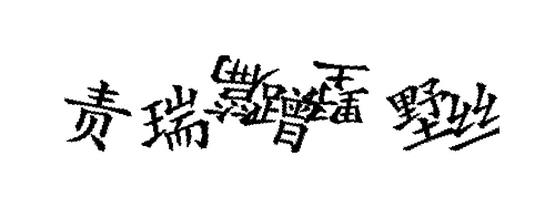

In [19]:
im

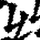

In [17]:
util.crop(im, y, x, radius=20)

In [18]:
Y[-1]

[1, 0]

In [22]:
X.shape

(1400, 40, 40, 1)

In [21]:
X = np.expand_dims(X, axis=3)

In [15]:
np.save('train_X', X)
np.save('train_Y', Y)

In [23]:
np.save('testing_X', X)
np.save('testing_Y', Y)

In [ ]:
X = np.squeeze(testing_X, axis=(3,))

In [ ]:
X = X.astype(bool)

In [ ]:
X = np.squeeze(X, axis=(3))

In [ ]:
Image.fromarray(X[1], '1')

In [ ]:
cr

xx = np.asarray(cr.convert('1'), dtype='float')

xx[20:40, 30:40]

xxx = xx.astype('uint8')*255

cr.convert('1')

cr

xxx.shape

Image.fromarray(xxx)

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras

model = keras.models.load_model('chunhu.keras')

In [ ]:
plt.ion()
for i in range(7):
    x = k_means_cluster_centers[i][0]
    y = k_means_cluster_centers[i][1]
    
    cr = util.crop(im, x, y, radius=20)
    X = np.asarray(cr.convert('1'), dtype='float')
    
    xx = X.astype('uint8')*255
    mm = Image.fromarray(xx)
    
    plt.imshow(mm, cmap='hot')
    plt.show()
    
    x0 = np.expand_dims(X, axis=0)
    x1 = np.expand_dims(x0, axis=3)
    
    m_y = model.predict(x1)
    print(m_y[0][0])